In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv(r"C:\Users\rasgu\OneDrive\Documents\VS Code\ml\datasets\Social_Network_Ads.csv")
dataset.head(5)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
#checking null value
dataset.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [4]:
#splitting dependent and independent variables
x=dataset.iloc[:,:-1]
y=dataset["Purchased"]

In [5]:
#scalling cause difference between age and estimated slaray is lot
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x)
x=pd.DataFrame(sc.transform(x), columns=x.columns)
x

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


In [6]:
#train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, random_state=42, test_size=0.2)

In [7]:
#decision tree model-classification model
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier() #this is based on gin index-from graph, so lets try to make one based on entropy
dt.fit(x_train, y_train)
dt.score(x_test,y_test)*100

83.75

In [8]:
#prediction
dt.predict([[19,19000]])
#gives wrong prediction cause low accuracy

c:\Users\rasgu\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [9]:
dt.predict([[35,20000]])

c:\Users\rasgu\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

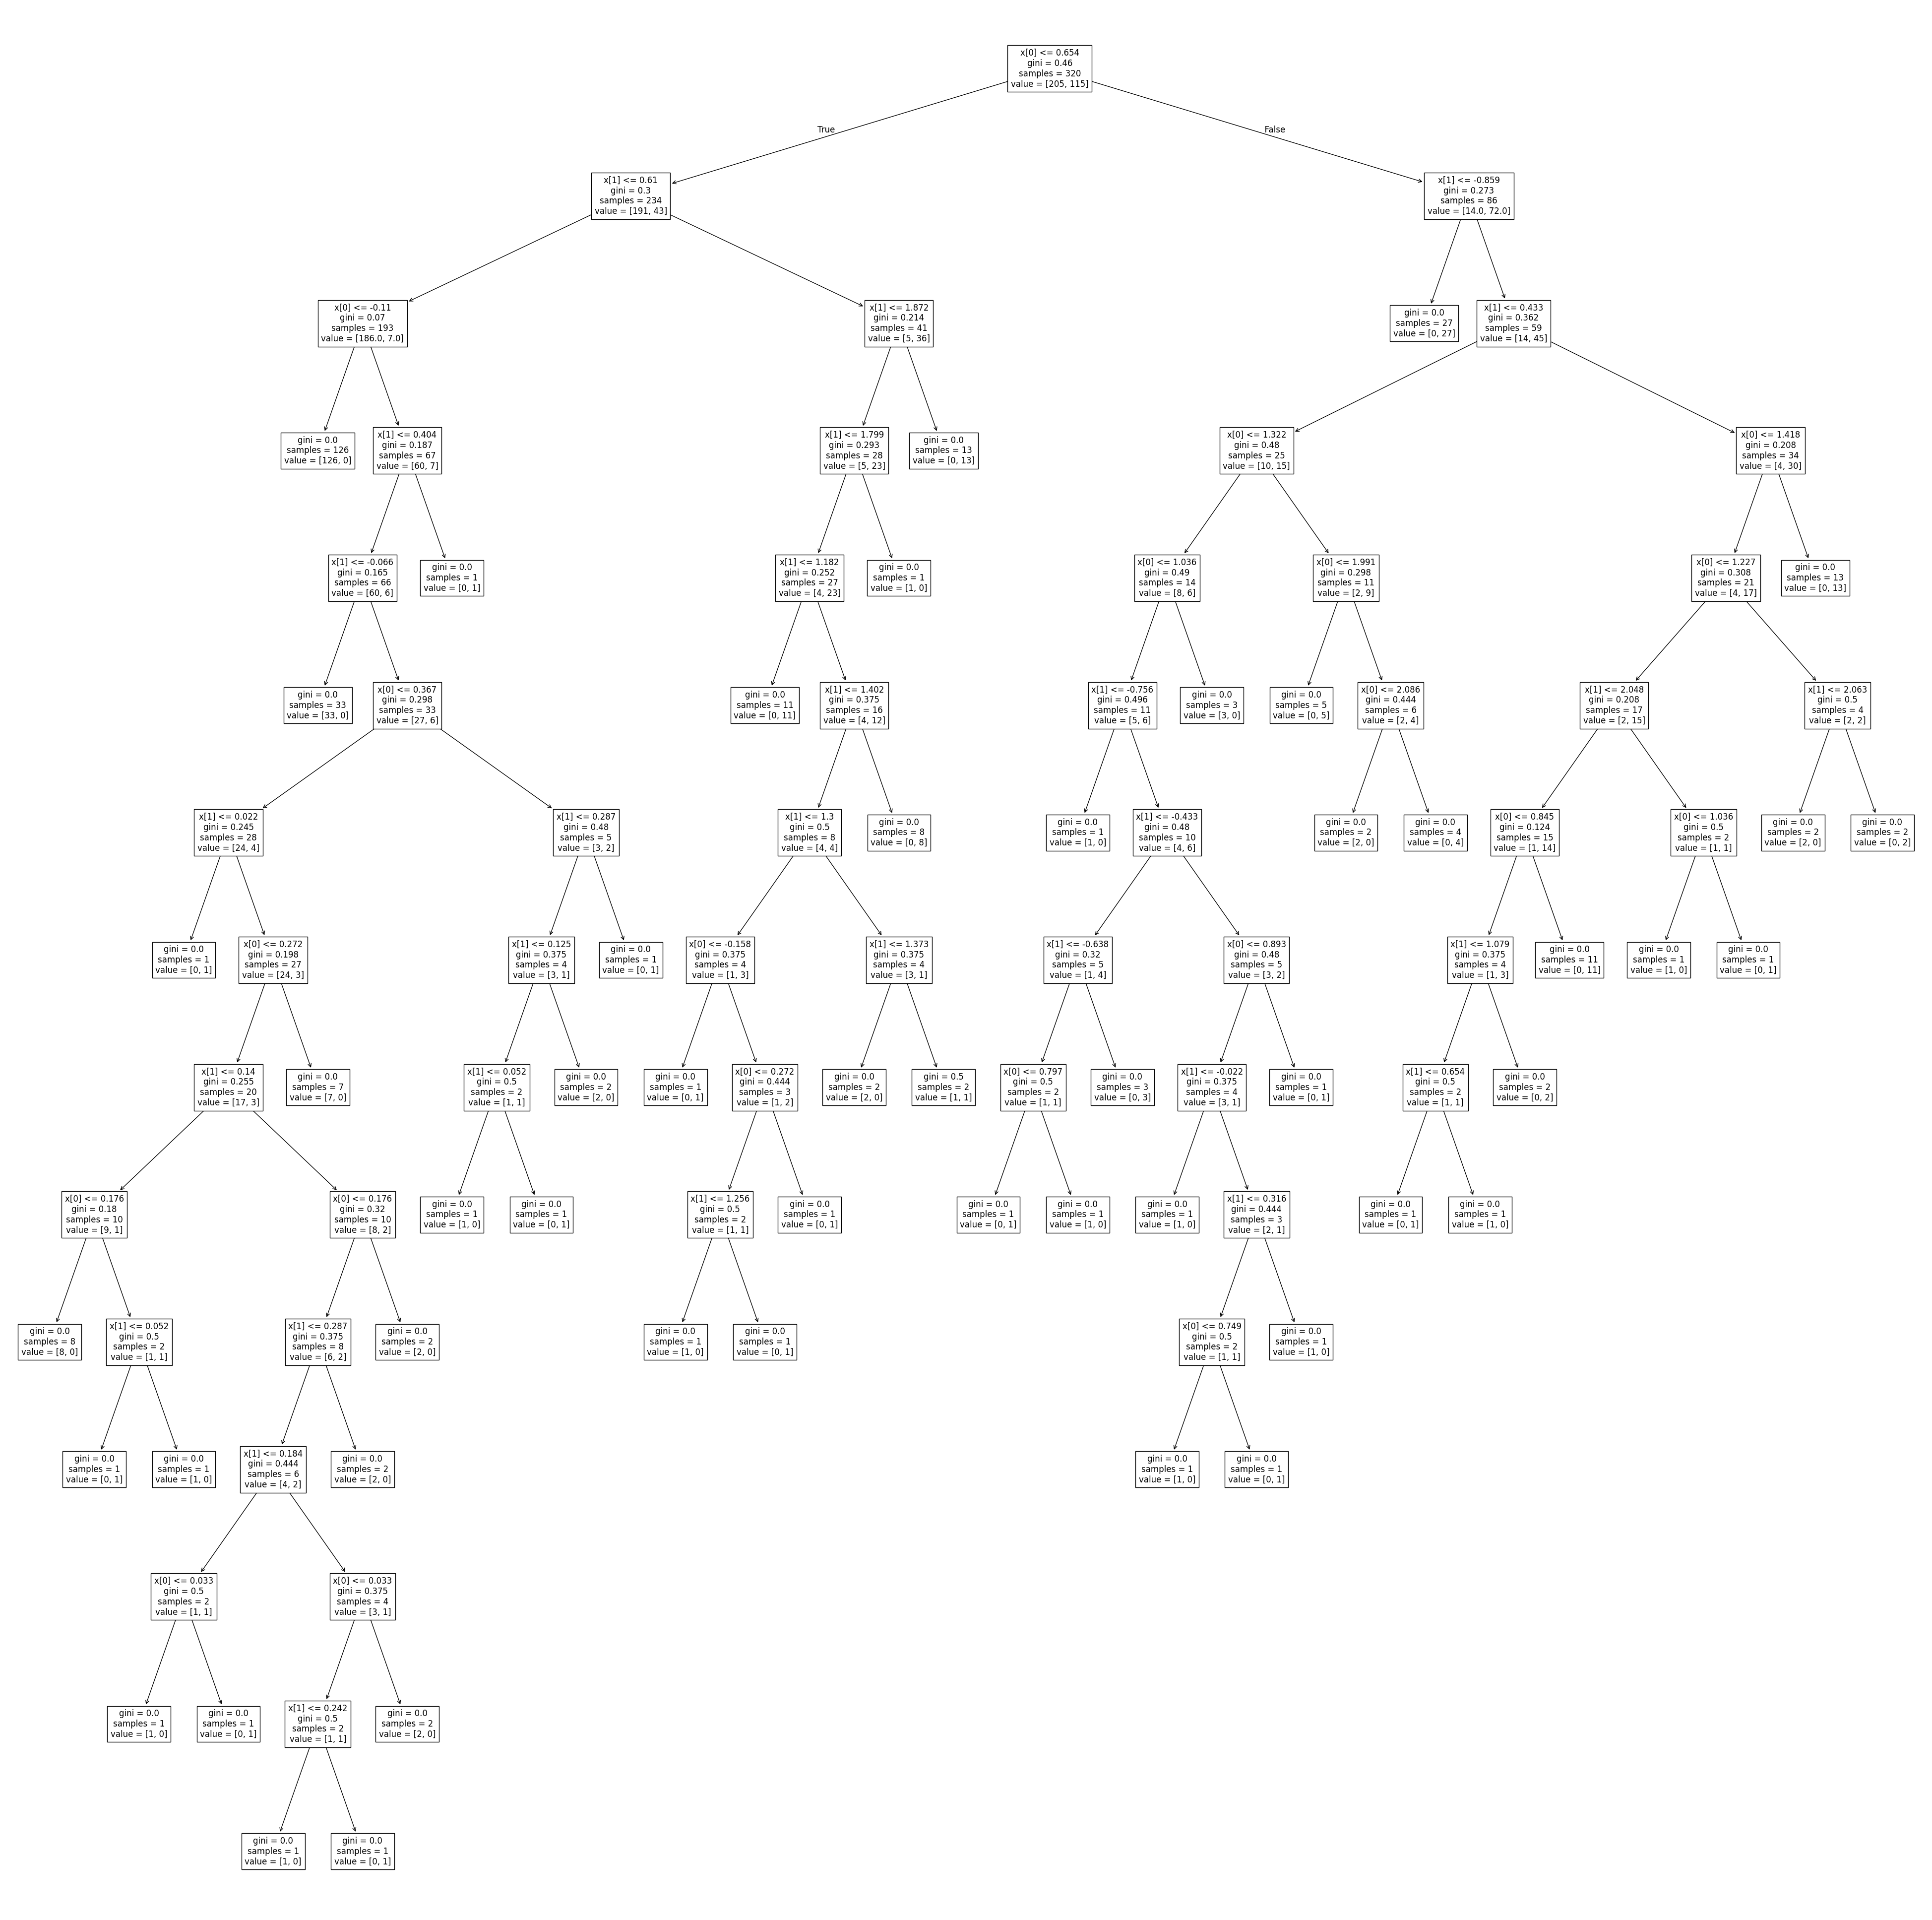

In [10]:
#graph analysis
from sklearn.tree import plot_tree
plt.figure(figsize=(50,50))
plot_tree(dt)
plt.savefig("decision tree.jpg")
plt.show()

In [11]:
#decision tree based on entropy
dt1=DecisionTreeClassifier(criterion="entropy")
dt1.fit(x_train, y_train)
dt1.score(x_test, y_test)*100
#not much change in score

83.75

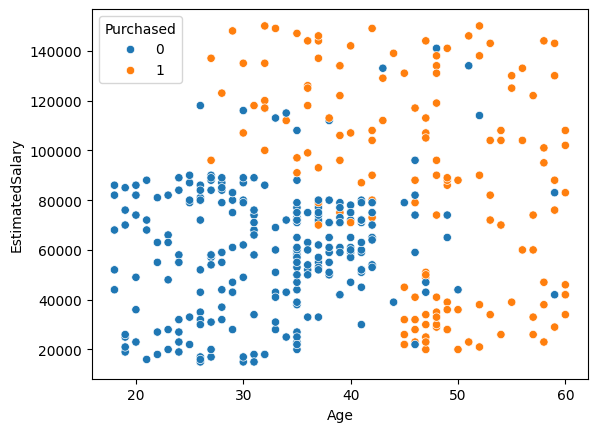

In [12]:
sns.scatterplot(x="Age", y="EstimatedSalary", data=dataset, hue="Purchased")
plt.show()
#this shows that its a non-linear graph

c:\Users\rasgu\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


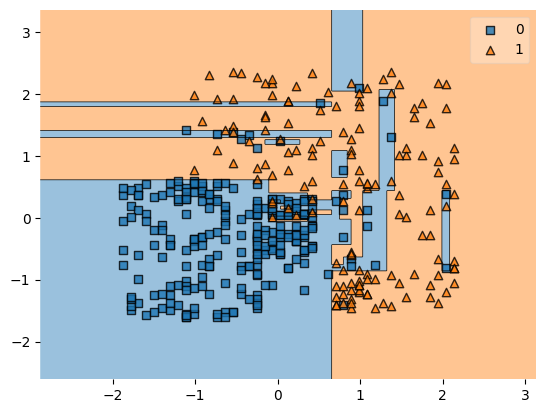

In [13]:
#graphical display og non-linear splitting
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dt)
plt.show()

c:\Users\rasgu\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


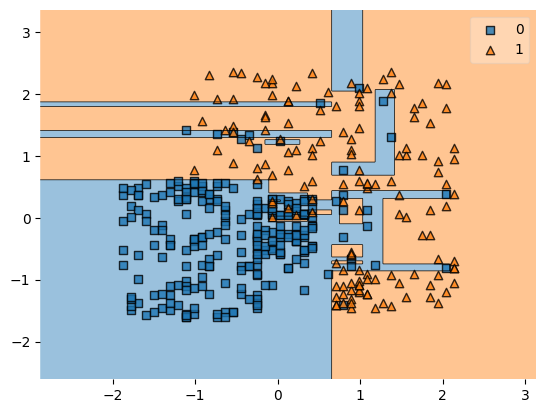

In [14]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dt1)
plt.show()

pruning


In [15]:
#pre-pruning
#check model is overfitted-training and testing accuracy difference is a lot

In [16]:
dt.score(x_test, y_test)*100

83.75

In [17]:
dt.score(x_train, y_train)*100

99.6875

In [18]:
#so this model is overfitted-use pruning
dt_pre=DecisionTreeClassifier(max_depth=5)
dt_pre.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [19]:
dt_pre.score(x_test,y_test)*100

90.0

In [20]:
dt_pre.score(x_train, y_train)*100

93.4375

c:\Users\rasgu\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


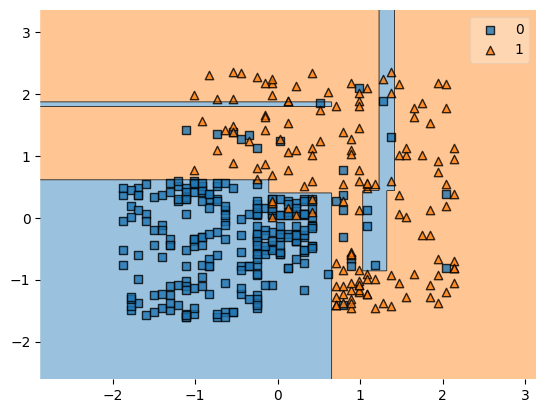

In [21]:
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=dt_pre)
plt.show()

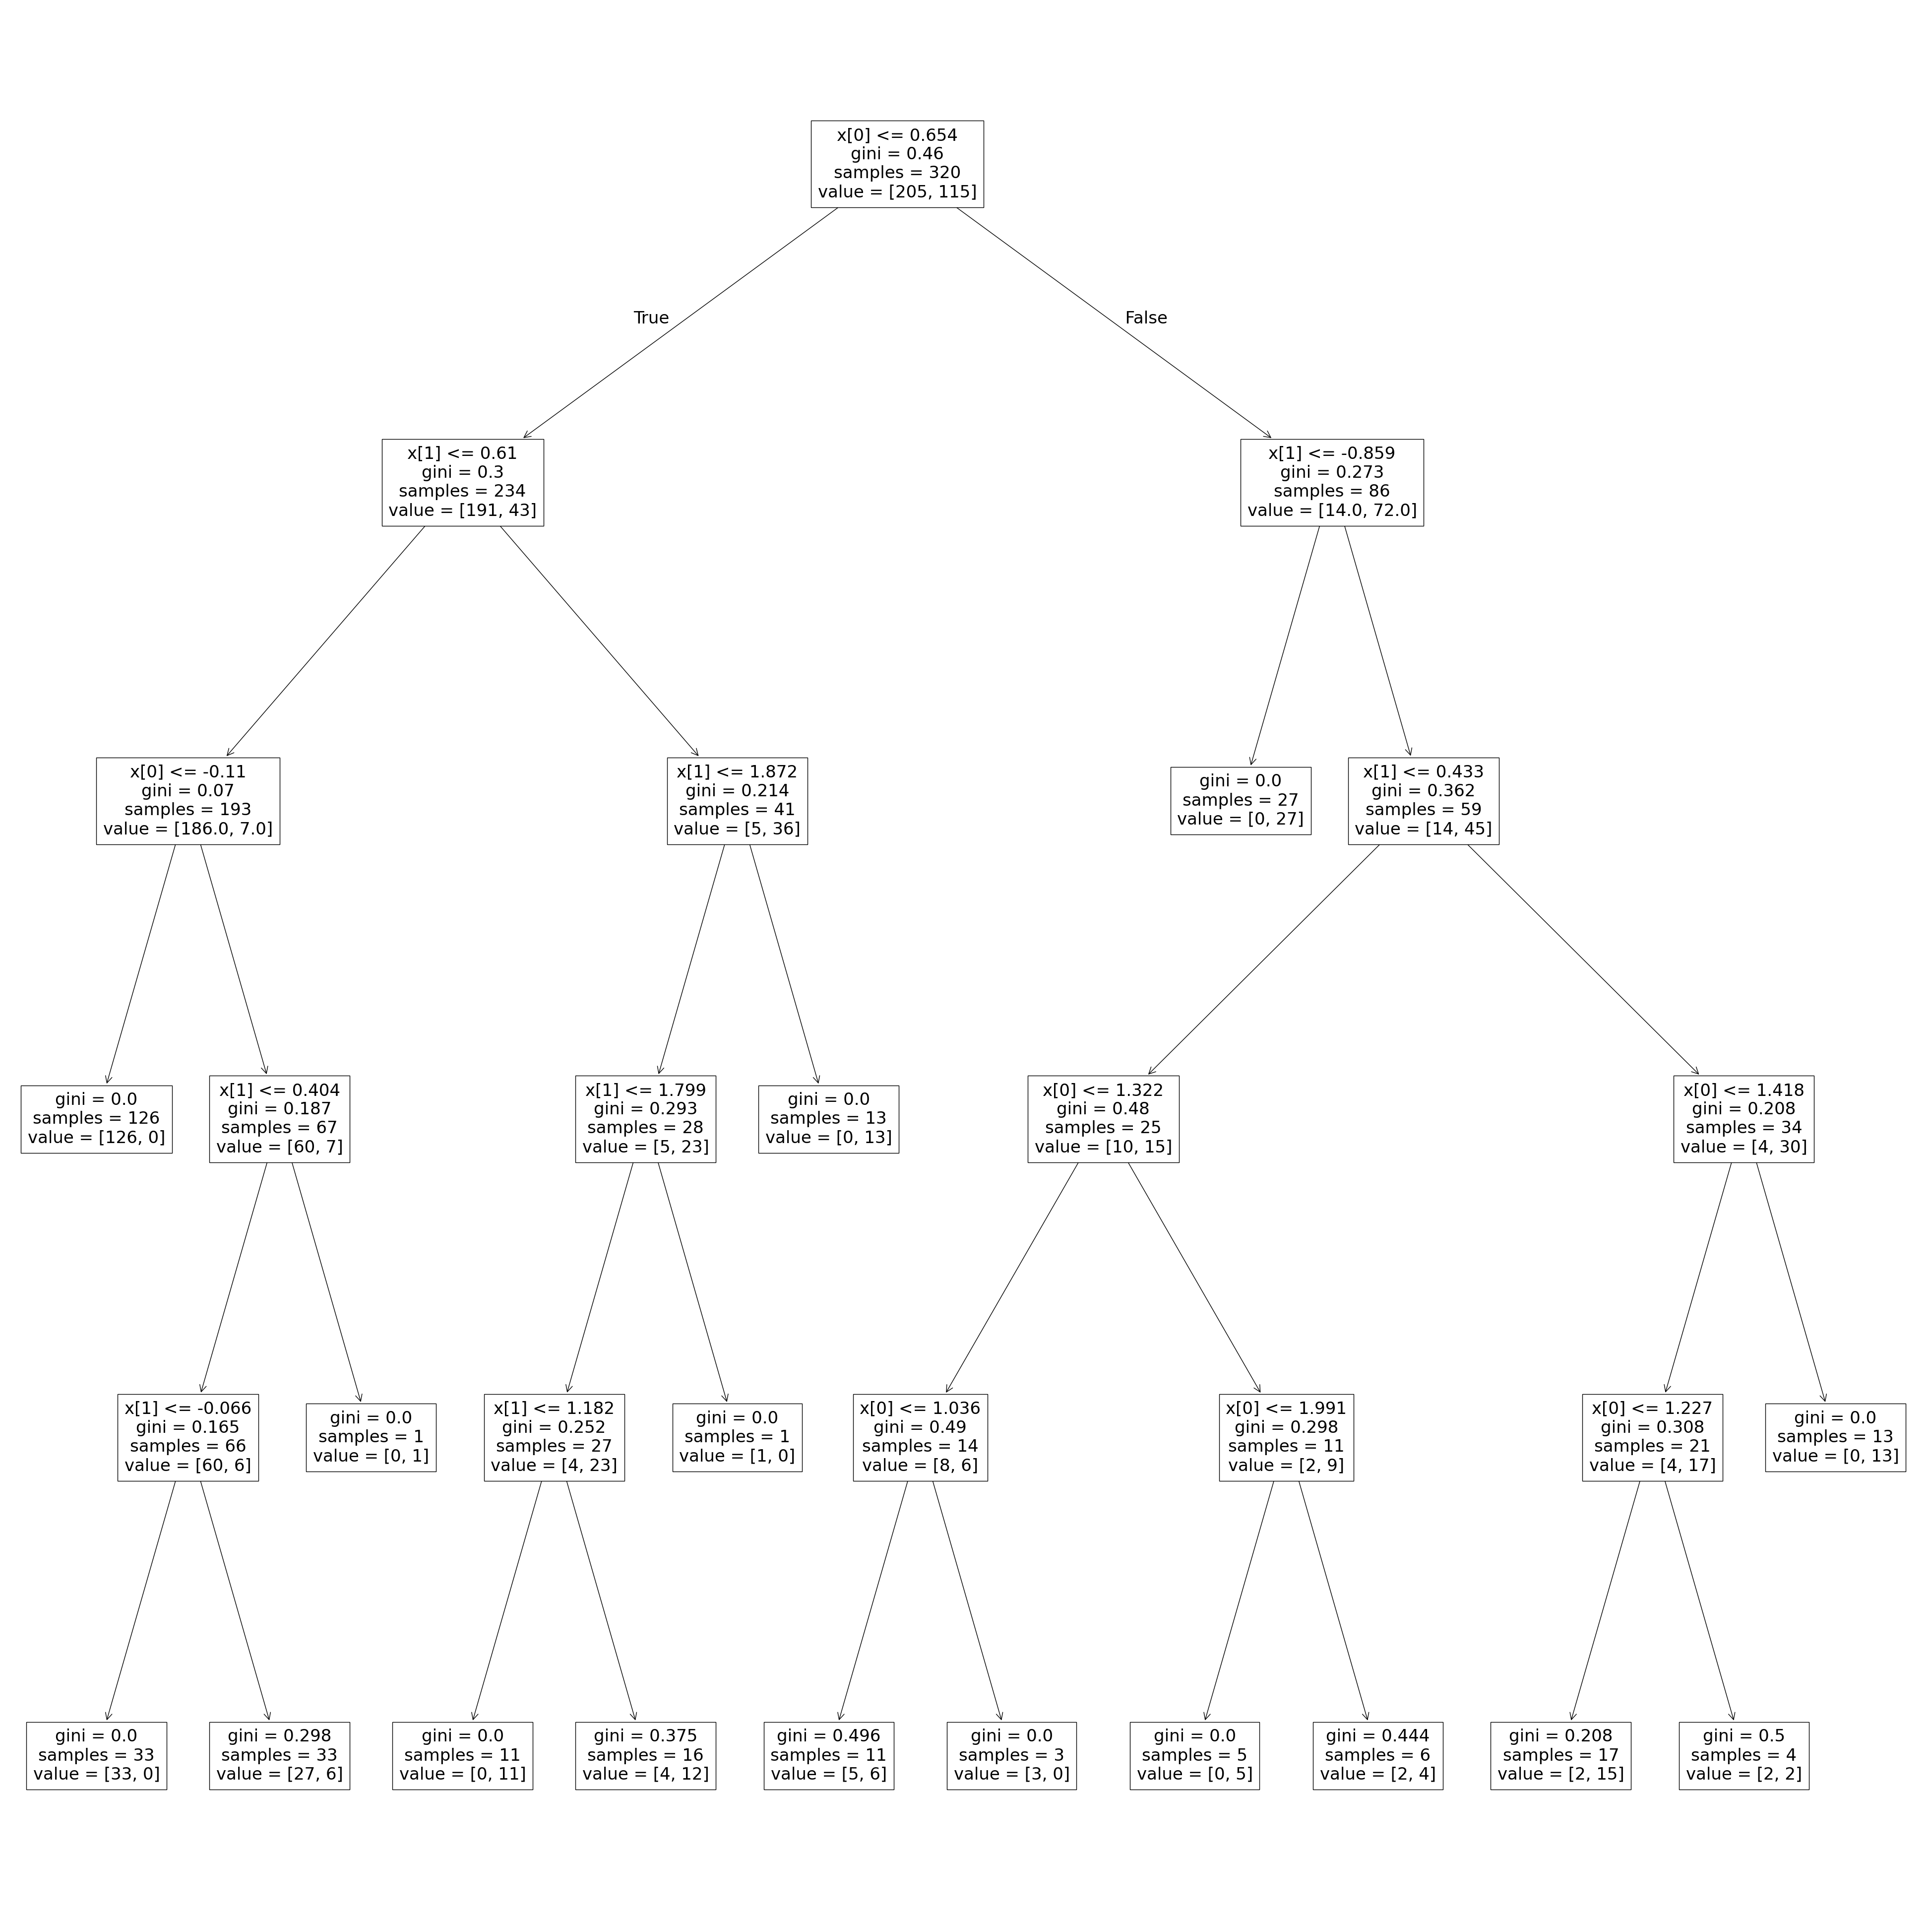

In [22]:
plt.figure(figsize=(50,50))
plot_tree(dt_pre)
plt.savefig("decision tree-prepruning.jpg")
plt.show()

In [23]:
#postpruning
#apply loop,
#check train and test accuracy and note at which depth what value is seen
#end loop by choosing max depth such that at that depth, difference between train and test score is minimum

In [24]:
results=[]

for i in range(1,20):
    dt_post=DecisionTreeClassifier(max_depth=i)
    dt_post.fit(x_train, y_train)

    results.append({
        "post_train":dt_post.score(x_train, y_train), 
        "post_test":dt_post.score(x_test, y_test), 
        "depth":i
        })
post_data=pd.DataFrame(results)
print(post_data)

#if dont want table form then dont add results and append part; just use-print(dt_post.score(x_train, y_train), dt_post.score(x_test, y_test), i) inside for loop

    post_train  post_test  depth
0     0.821875     0.9000      1
1     0.918750     0.9125      2
2     0.918750     0.9125      3
3     0.931250     0.9125      4
4     0.934375     0.9000      5
5     0.950000     0.8625      6
6     0.968750     0.8500      7
7     0.971875     0.8500      8
8     0.981250     0.8500      9
9     0.984375     0.8500     10
10    0.990625     0.8375     11
11    0.993750     0.8375     12
12    0.996875     0.8375     13
13    0.996875     0.8375     14
14    0.996875     0.8375     15
15    0.996875     0.8375     16
16    0.996875     0.8375     17
17    0.996875     0.8375     18
18    0.996875     0.8375     19


In [25]:
#choose the depth which has min difference between train and test scores
#so let max depth=3

dt_post=DecisionTreeClassifier(max_depth=3)
dt_post.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

c:\Users\rasgu\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


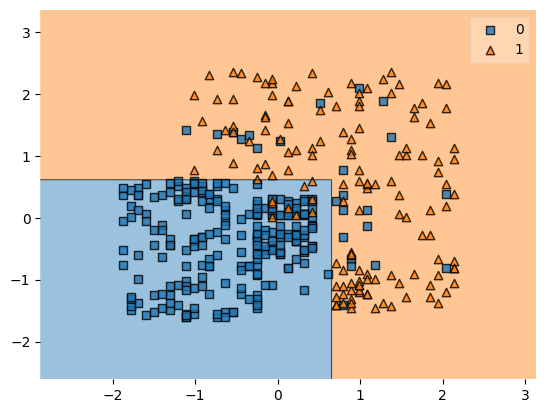

In [26]:
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=dt_post)
plt.show()

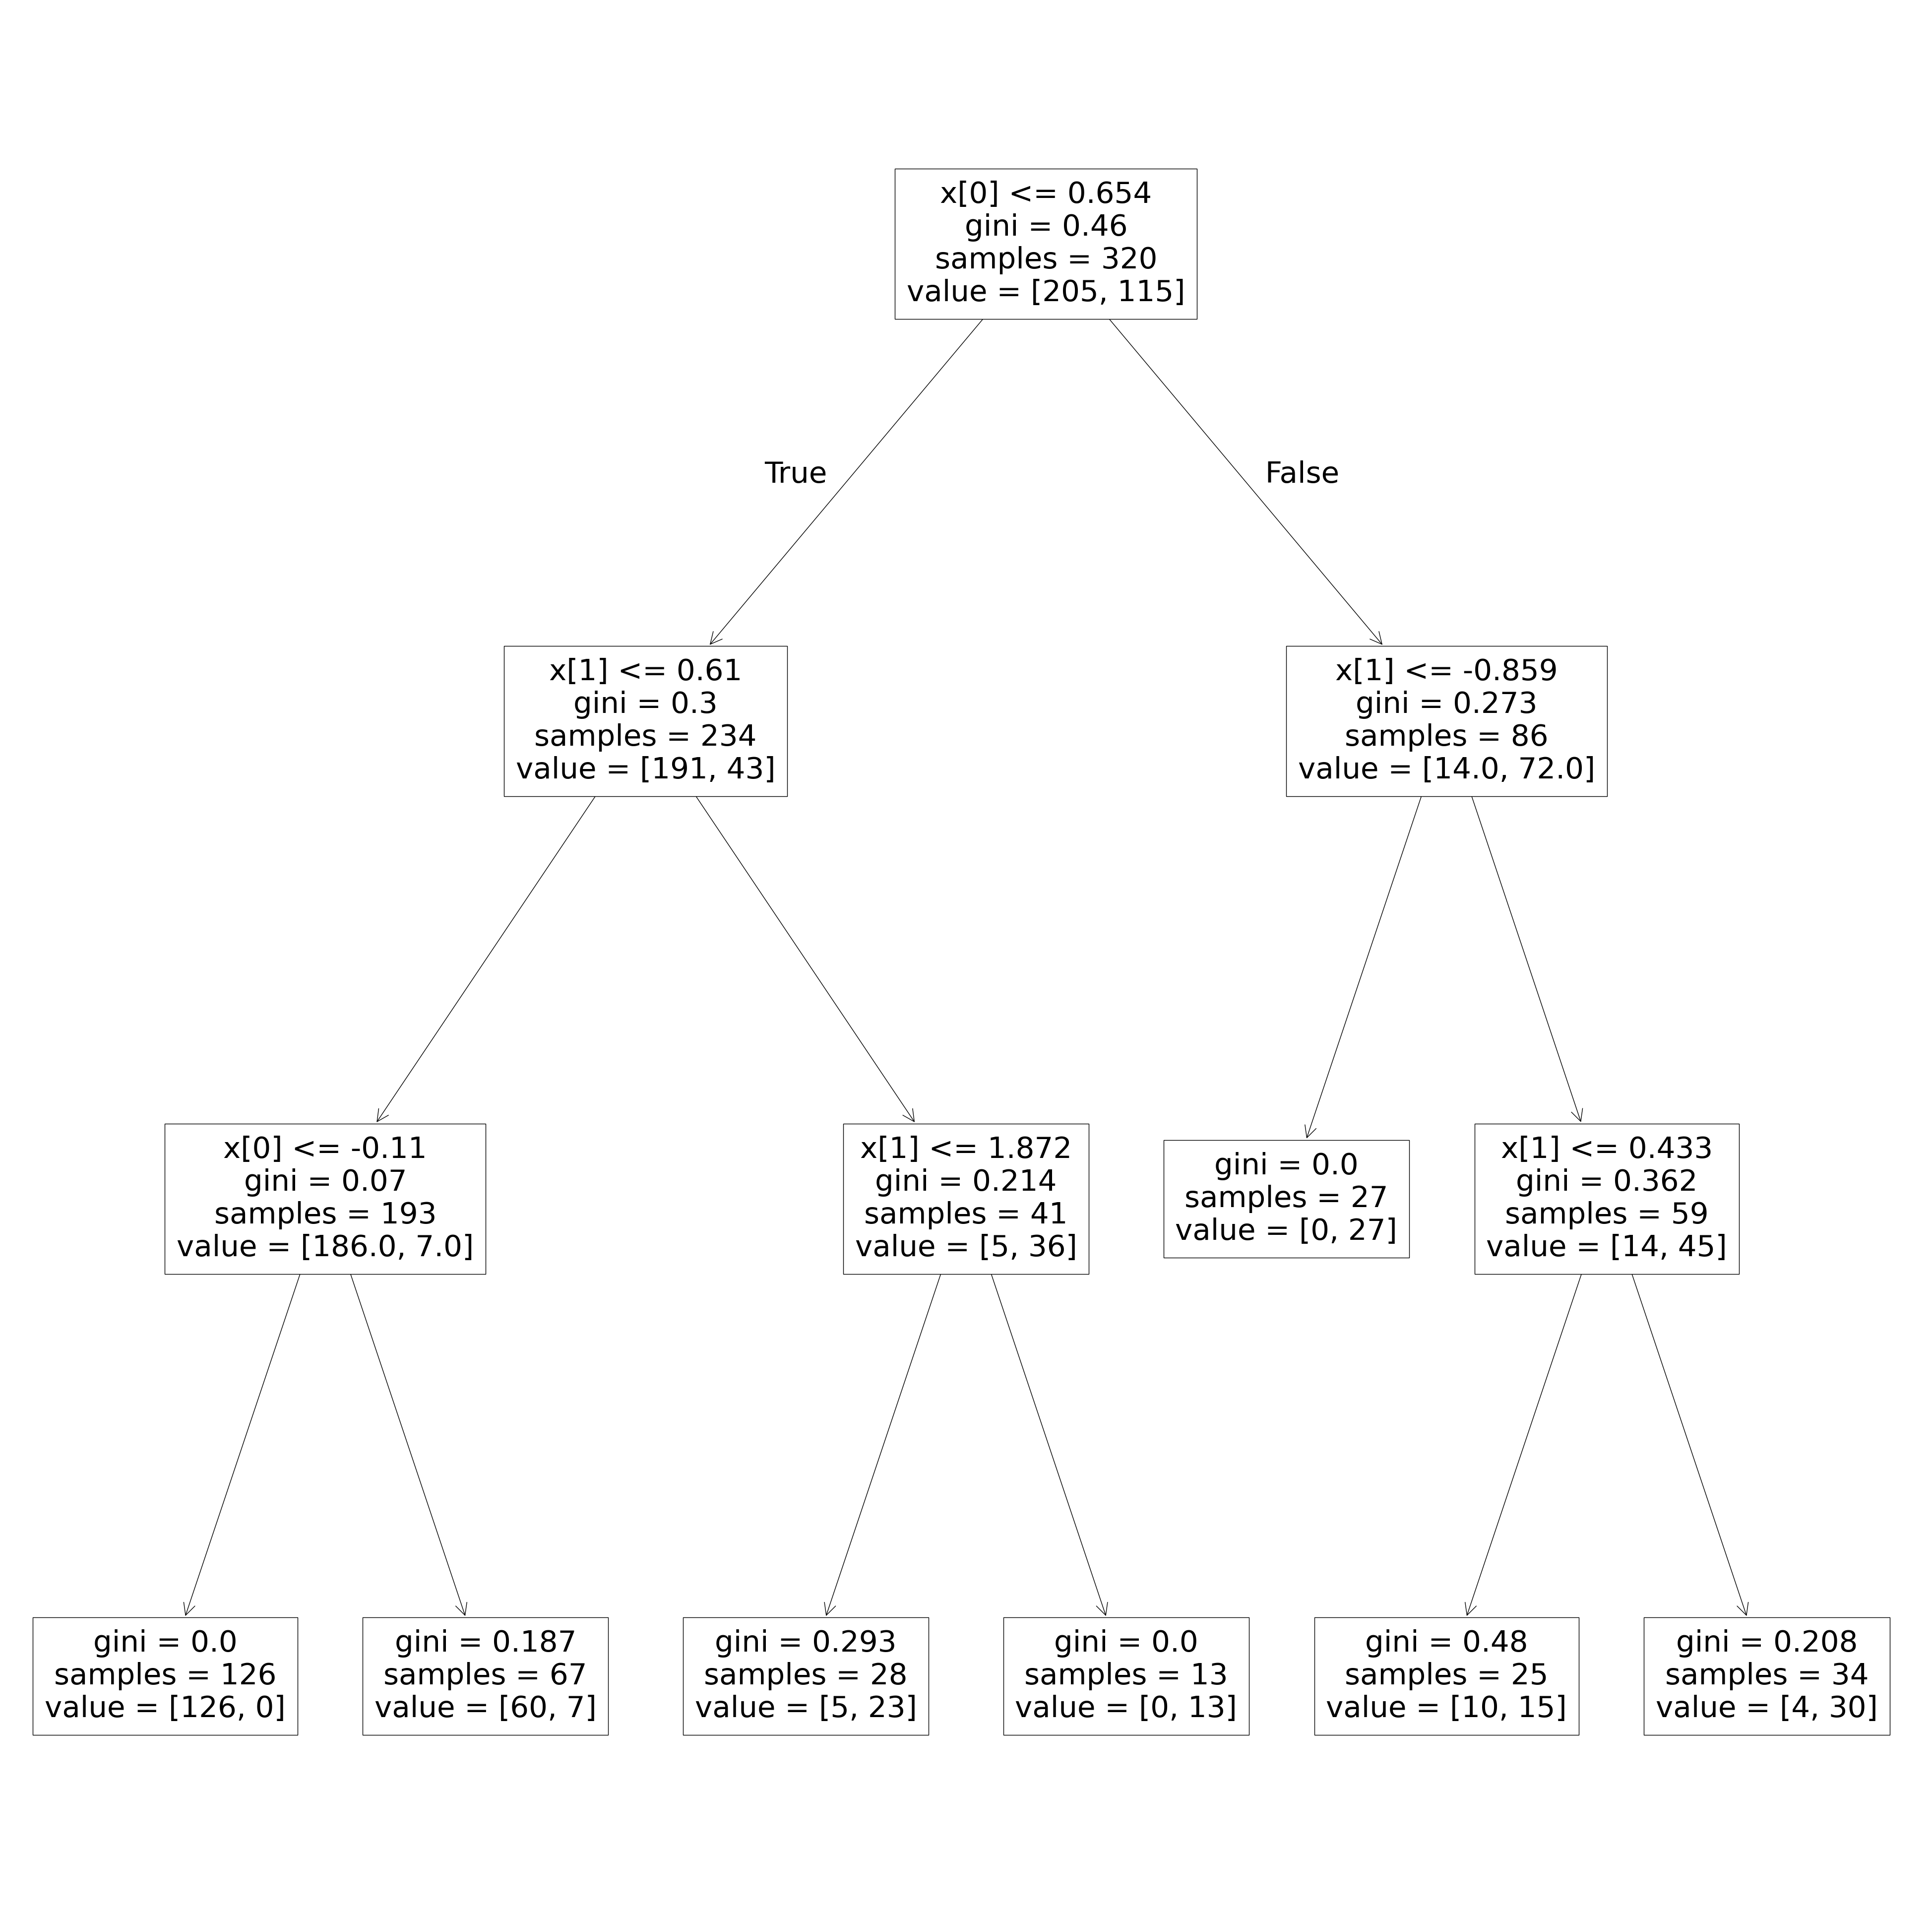

In [28]:
plt.figure(figsize=(50,50))
plot_tree(dt_post)
plt.savefig("decision tree-postpruning.jpg")
plt.show()